In [1]:
# 라이브러리 호출
import numpy as np
import scipy.io
import matplotlib.pyplot as plt

In [2]:
# MAT 파일 불러오기
mat_path = r"../HW3_package/hw3_prob2.mat"
mat_data = scipy.io.loadmat(mat_path)

mu = 0.02
lmbd = 0.0002 

f = mat_data['f']
x_orig = mat_data['x_orig']

In [3]:
def Dh(u):
    rows, cols = u.shape
    d = np.zeros((rows, cols))
    d[:, 1:cols] = u[:, 1:cols] - u[:, 0:cols-1]
    d[:, 0] = u[:, 0] - u[:, cols-1]
    return d

def Dht(u):
    rows, cols = u.shape
    d = np.zeros((rows, cols))
    d[:, 0:cols-1] = u[:, 0:cols-1] - u[:, 1:cols]
    d[:, cols-1] = u[:, cols-1] - u[:, 0]
    return d

def Dv(u):
    rows, cols = u.shape
    d = np.zeros((rows, cols))
    d[1:rows, :] = u[1:rows, :] - u[0:rows-1, :]
    d[0, :] = u[0, :] - u[rows-1, :]
    return d

def Dvt(u):
    rows, cols = u.shape
    d = np.zeros((rows, cols))
    d[0:rows-1, :] = u[0:rows-1, :] - u[1:rows, :]
    d[rows-1, :] = u[rows-1, :] - u[0, :]
    return d

In [4]:
# 1로 초기화 
x = np.zeros(f.shape)

stopping_point = 1e-4
sigma = 200
lambda_v = 2
result = []

x = np.zeros(f.shape)

dh = np.zeros(f.shape)
dv = np.zeros(f.shape)
qh = np.zeros(f.shape)
qv = np.zeros(f.shape)


for iter in range(100000):
    x_minus1 = x
        
    # minimize x
    x = ((mu * f) / (mu + 4 * lmbd)) + ((lmbd / (mu + 4 * lmbd)) * (np.roll(x, 1, axis = 0) + np.roll(x, -1, axis = 0) + np.roll(x, 1, axis = 1) + np.roll(x, -1, axis = 1)
                                                                      + Dht(dh - qh) + Dvt(dv - qv)))
    
    # minimize dv, dh
    dh =  np.sign(Dh(x) + qh) * np.maximum(np.abs(Dh(x) + qh) - (1 / lmbd), 0)
    dv =  np.sign(Dv(x) + qv) * np.maximum(np.abs(Dv(x) + qv) - (1 / lmbd), 0)
        
    # minimize qv, qh 
    qh = qh + (Dh(x) - dh)
    qv = qv + (Dv(x) - dv)
        
        
    # break check
    if  (np.linalg.norm((x - x_minus1), 2) / np.linalg.norm(x, 2)) < stopping_point and iter > 1:
        break    


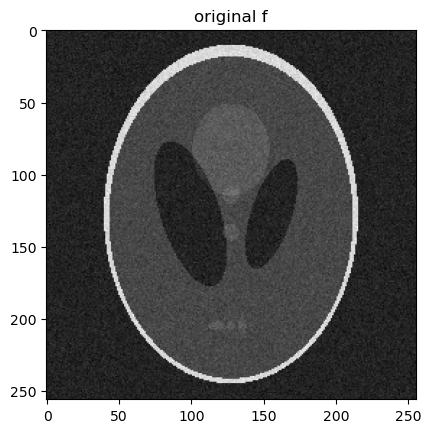

In [8]:
# original f 
plt.imshow(f, cmap = "gray")                                                                                                                   # original f plt.imshow(f, cmap = "gray")
plt.title( label = "original f")
plt.show()

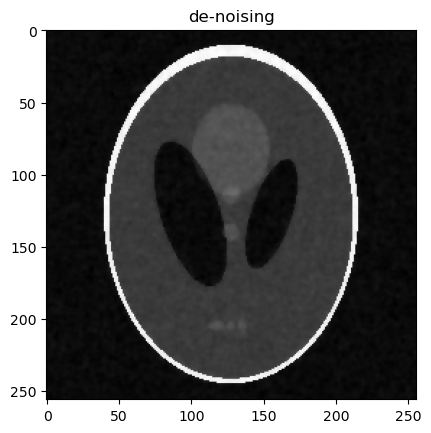

In [9]:
# original f 
plt.imshow(x, cmap = "gray")
plt.title( label = "de-noising")
plt.show()

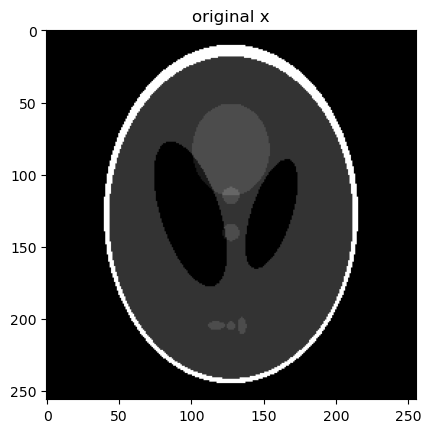

In [10]:
# original x 
plt.imshow(x_orig, cmap = "gray")
plt.title( label = "original x")
plt.show()